In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("concrete_data.csv")

In [3]:
df.shape

(1030, 9)

In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [6]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


[Text(0, 0, 'cement'),
 Text(1, 0, 'blast_furnace_slag'),
 Text(2, 0, 'fly_ash'),
 Text(3, 0, 'water'),
 Text(4, 0, 'superplasticizer'),
 Text(5, 0, 'coarse_aggregate'),
 Text(6, 0, 'fine_aggregate '),
 Text(7, 0, 'age'),
 Text(8, 0, 'concrete_compressive_strength')]

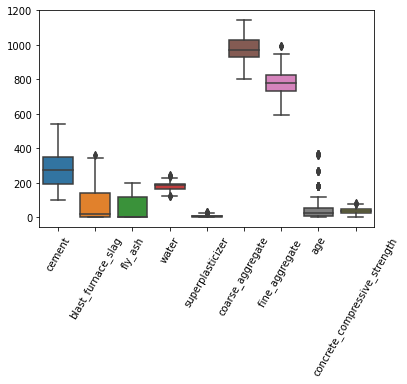

In [7]:
plt.subplots()
ax = sns.boxplot(data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

In [8]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

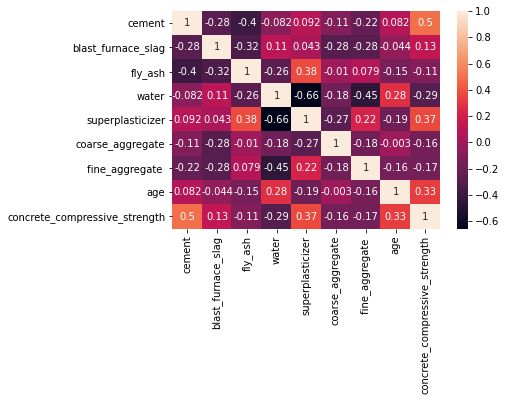

In [9]:
sns.heatmap(data = df.corr(), annot = True)

In [10]:
x = df.drop(["concrete_compressive_strength"], axis = 1)
y = df["concrete_compressive_strength"]

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
print(lr.score(x_train_scaled, y_train))

y_pred = lr.predict(x_test_scaled)
print(metrics.r2_score(y_test, y_pred))

0.6107353423378381
0.6237310689052717


In [14]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 3, metric = "euclidean")
knn.fit(x_train_scaled, y_train)

print(knn.score(x_train_scaled, y_train))

y_pred_knn = knn.predict(x_test_scaled)
print(metrics.r2_score(y_test, y_pred_knn))

0.8533841348552327
0.6985803353805147


In [15]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_neighbors":[1,2,3,4,5,6,7,8,9,11,13,15,17,19],
    "metric":["euclidean","manhattan","minkowski"]
}

gs = GridSearchCV(
    KNeighborsRegressor(),
    grid_params,
    cv = 20
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.6781776541679558
KNeighborsRegressor(metric='euclidean')
{'metric': 'euclidean', 'n_neighbors': 5}


In [16]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)

print(dt.score(x_train_scaled, y_train))

y_pred_dt = dt.predict(x_test_scaled)
print(metrics.r2_score(y_test, y_pred_dt))

0.9949311356475837
0.842729074279811


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.r2_score(y_test, y_pred_rf))

0.9814711103600926
0.9233044891453859


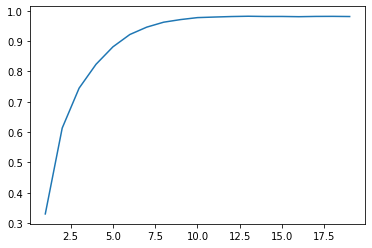

In [18]:
max_depth_range = list(range(1, 20))
r2 = []
for i in max_depth_range:
    rf = RandomForestRegressor(max_depth = i)
    rf.fit(x_train_scaled, y_train)
    score = rf.score(x_train_scaled, y_train)
    r2.append(score)
    
plt.plot(max_depth_range, r2)

In [19]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_estimators":[10, 50, 90, 100, 150, 200, 250],
    "max_depth":list(range(5, 12))
}

gs = GridSearchCV(
    RandomForestRegressor(),
    grid_params,
    cv = 10
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.8824137199462895
RandomForestRegressor(max_depth=11, n_estimators=250)
{'max_depth': 11, 'n_estimators': 250}


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 150, max_depth = 20)
rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.r2_score(y_test, y_pred_rf))

0.9817671196536104
0.9228073278325835


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train_scaled, y_train)

print(gbr.score(x_train_scaled, y_train))

y_pred_gbr = gbr.predict(x_test_scaled)
print(metrics.r2_score(y_test, y_pred_gbr))

0.943116175584626
0.9207182545015844


In [26]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {
    'criterion': ['squared_error', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

gs = RandomizedSearchCV(
    GradientBoostingRegressor(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.9102873212521637
GradientBoostingRegressor(criterion='squared_error', learning_rate=0.15,
                          max_depth=4, max_leaf_nodes=7, n_estimators=250,
                          subsample=0.8)
{'subsample': 0.8, 'n_estimators': 250, 'max_leaf_nodes': 7, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.15, 'criterion': 'squared_error'}


In [27]:
gbr = GradientBoostingRegressor(subsample = 0.8, n_estimators = 420, max_leaf_nodes = 7, max_features = None, max_depth = 4, learning_rate = 0.15, criterion = "squared_error")
gbr.fit(x_train_scaled, y_train)

print(gbr.score(x_train_scaled, y_train))

y_pred_gbr = gbr.predict(x_test_scaled)
print(metrics.r2_score(y_test, y_pred_gbr))

0.98802112182783
0.9458851080148076
